In [1]:
import xarray as xr #conda install -c conda-forge xarray dask netCDF4 bottleneck
#conda intall 안되면 pip install basemap

import numpy as np

import matplotlib.pyplot as plt #conda install matplotlib

from mpl_toolkits.basemap import Basemap
#local 환경 : pip install basemap (안되면 conda update --all 후 재실행.)
#forecast 1 : conda actiavte p3.6_cpu 환경에서만 돌아감. (conda env list 에서 p3.6_cpu 확인.)


In [2]:
path = 'C:/Users/admin/workspace/datasets/precip.mon.mean.nc' 
#절대 경로. #같은 폴더에 위치한다면 상대경로도 ok. 
ncfile = xr.open_dataset(path) # file을 읽어서 ncfile에 저장
print(ncfile)

<xarray.Dataset>
Dimensions:  (lat: 72, lon: 144, time: 456)
Coordinates:
  * lat      (lat) float32 88.75 86.25 83.75 81.25 ... -83.75 -86.25 -88.75
  * lon      (lon) float32 1.25 3.75 6.25 8.75 11.25 ... 351.2 353.8 356.2 358.8
  * time     (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2016-12-01
Data variables:
    precip   (time, lat, lon) float32 ...
Attributes:
    Conventions:    COARDS
    title:          CPC Merged Analysis of Precipitation (excludes NCEP Reana...
    platform:       Analyses
    source:         ftp ftp.cpc.ncep.noaa.gov precip/cmap/monthly
    dataset_title:  CPC Merged Analysis of Precipitation
    documentation:  https://www.esrl.noaa.gov/psd/data/gridded/data.cmap.html
    References:     https://www.esrl.noaa.gov/psd/data/gridded/data.cmap.html
    version:        V1701
    history:        update 11/2016 V1701


# Data Processing

In [3]:
#select variable
precip=ncfile.data_vars['precip'] #precip에 datafile의 precip vars지정.
print(precip.shape) #precip 차원 보여줌. #[time, lat, lon]

(456, 72, 144)


In [4]:
#check null values 
np.sum(np.isnan(precip)) 
#np.isnan() : 괄호한이 is not a number인지 확인. 
#not a number 일 시 : True, not a number가 아닐 시 : False 반환
#np.sum () axis없으면 모든 elment의 합. 
#axis관련 문서는 #http://taewan.kim/post/numpy_sum_axis/ 참조.

<xarray.DataArray 'precip' ()>
array(325460)

In [5]:
#1. spatial domain
precip_global = precip.sel(lon=ncfile.lon, lat=ncfile.lat) #here we set global domain
#DataArray.sel() = Return a new DataArray whose data is given by selecting index labels along the specified dimension(s).

#2. Yearly average
year_ave = np.nanmean(precip_global, axis=0)
#numpy.nanmean( a , axis=None , dtype=None , out=None , keepdims=<값 없음 > ) 
#NaN을 무시하고 지정된 축을 따라 산술 평균을 계산합니다.
#여기서는 Nan값이 존재하지 않으므로 np.mean을 사용해도 무관하다. 

C:\Users\Public\Documents\ESTsoft\CreatorTemp/ipykernel_17180/3780585120.py:6: RuntimeWarning: Mean of empty slice
  year_ave = np.nanmean(precip_global, axis=0)


In [6]:
##np.mean ↔ np.nanmean 차이 확인 example.
print(np.mean([1,np.NaN,3])) #nan이 포함되어있으면 nan반환.
print(np.nanmean([1,np.NaN, 3])) #nan이 포함되어있어도 무시하고 평균 반환. 

nan
2.0


# Visualization

In [8]:
#set map projection
m = Basemap(
    #projection = 'robin', projection type은 https://matplotlib.org/basemap/users/mapsetup.html 참조.
    lon_0=180, lat_0=0, #center of map domain
    llcrnrlon=0, llcrnrlat=-90, urcrnrlon=360, urcrnrlat=90, #projection region 
    #https://matplotlib.org/basemap/api/basemap_api.html 참조.
    resolution = 'h') #resolution h, f 오류 :  pip install basemap-data-hires 

In [9]:
#coordination
coord = np.meshgrid(ncfile.lon, ncfile.lat) #grid만들기

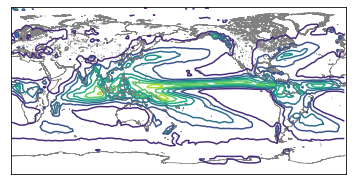

In [11]:
#draw contour map
m.drawcoastlines(linewidth=0.75, color='gray') #draw coastlines
m.contour(coord[0],coord[1],year_ave) #contour map

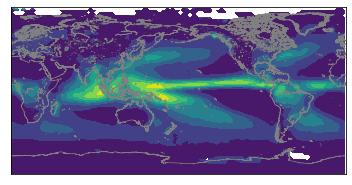

In [12]:
m.drawcoastlines(linewidth=0.7, color='gray') #draw coastlines
m.contourf(coord[0],coord[1],year_ave) # make filled contour plot.